## Import Library dan Dataset

In [1]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8); # setting the figuresize

from datetime import datetime, date #Library to deal with datetime columns

# time series analysis libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# time series forecasting libraries
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Neural network required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# model evaluation libraries
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#for saving trained model
import pickle

import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

In [3]:
#Download Dataset
!gdown --id 1OvHyrwTpi9HPcpo5ldutNvFvpU7h52Y6

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1OvHyrwTpi9HPcpo5ldutNvFvpU7h52Y6
To: /content/DailyDelhiClimate.csv
100% 78.2k/78.2k [00:00<00:00, 90.8MB/s]


In [5]:
#Import Dataset
dataset = pd.read_csv('/content/DailyDelhiClimate.csv')
df = dataset[['date', 'meantemp']]
df

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632


In [8]:
df.describe(include = 'all')

,date,meantemp
count,1462,1462.000000
unique,1462,NaN
top,2013-01-01,NaN
freq,1,NaN
mean,NaN,25.495521
std,NaN,7.348103
min,NaN,6.000000
25%,NaN,18.857143
50%,NaN,27.714286
75%,NaN,31.305804


In [9]:
print(f'Time period start : {df.date.min()}\nTime period end : {df.date.max()}')

Time period start : 2013-01-01
Time period end : 2017-01-01


## Preprocessing Data and Visualization

In [20]:
df.duplicated().sum()

0

In [10]:
# Converting year column to datetime format
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [19]:
# Setting year as index for easier manipulations
y = df
y = df.set_index('date')

In [13]:
y

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000
...,...
2016-12-28,17.217391
2016-12-29,15.238095
2016-12-30,14.095238


In [14]:
y.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

In [15]:
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meantemp  1462 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [16]:
# Null values check
y.isnull().sum()

meantemp    0
dtype: int64

In [17]:
y.head()

,meantemp
date,
2013-01-01,10.000000
2013-01-02,7.400000
2013-01-03,7.166667
2013-01-04,8.666667
2013-01-05,6.000000


In [105]:
#Split Data Train dan Data Test

# Jumlah total pengamatan dalam dataset
total_observations = len(y)

# Persentase data untuk pelatihan
train_percentage = 0.8

# Jumlah observasi untuk pelatihan
train_size = int(total_observations * train_percentage)

# Membagi dataset menjadi data latih dan data uji
train_ts = y.iloc[:train_size]
test_ts = y.iloc[train_size:]

## Time Series Analisis

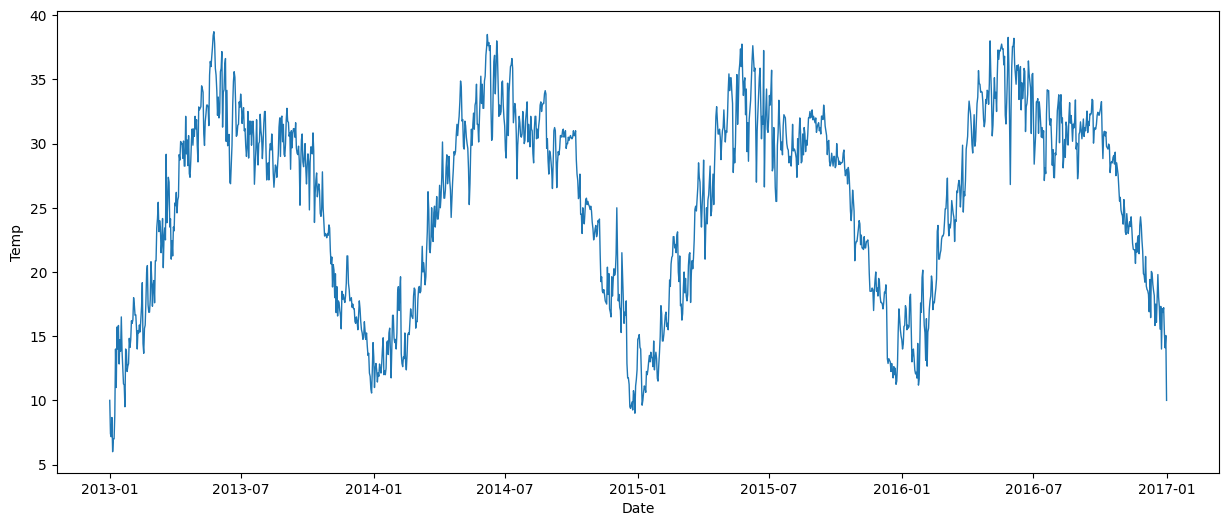

In [23]:
# Time Series plot
plt.figure(figsize = (15,6))
plt.plot(y,linewidth = 1)
plt.xlabel('Date')
plt.ylabel('Temp')
plt.show()

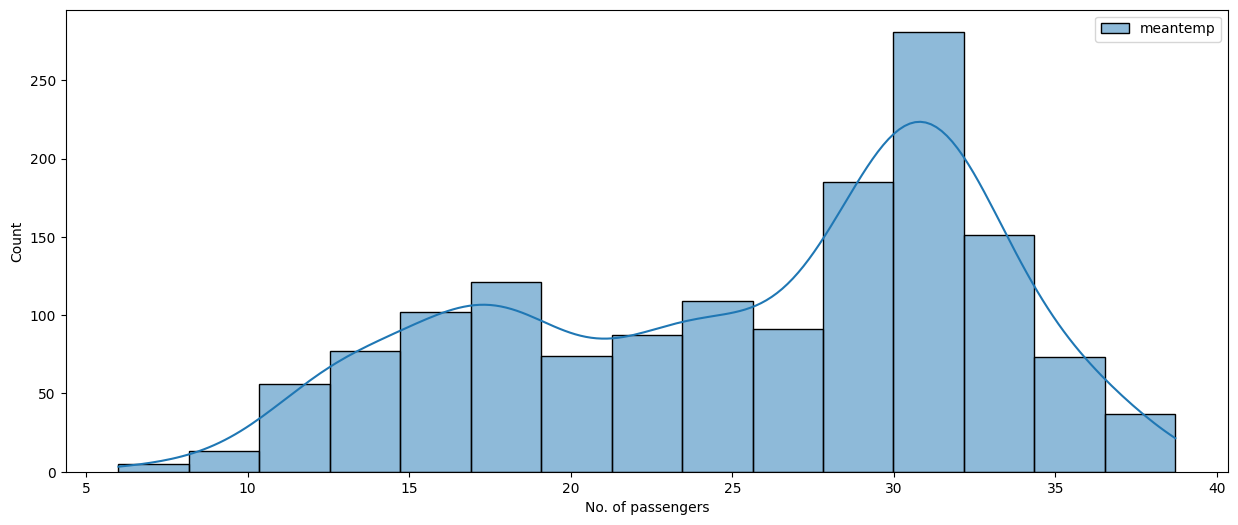

In [21]:
# Density Plot
plt.figure(figsize = (15,6))
sns.histplot(y, kde = True)
plt.xlabel('No. of passengers')
plt.ylabel('Count')
plt.show()

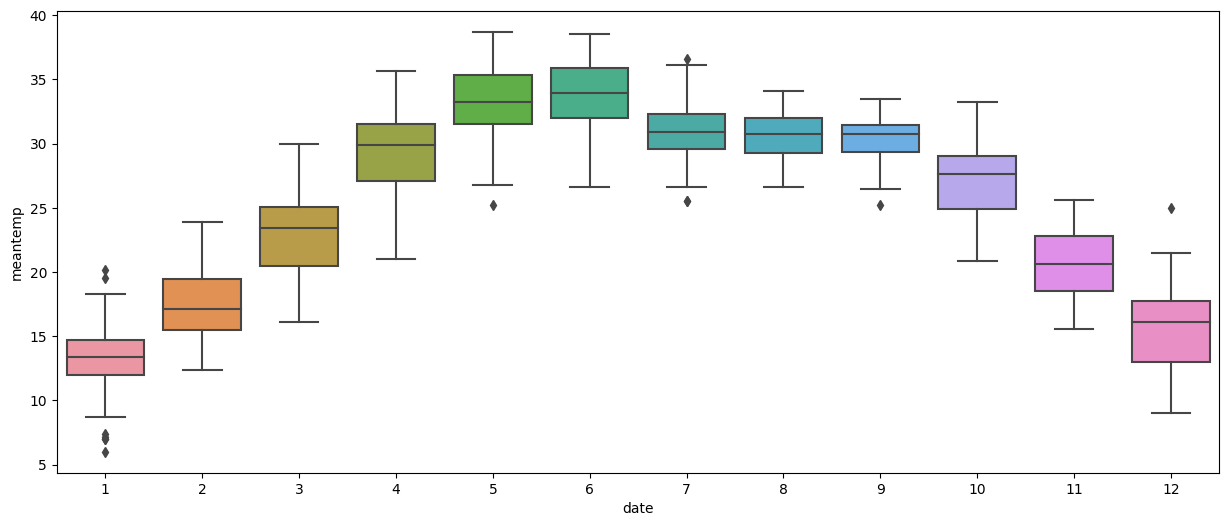

In [24]:
# Box-plot
plt.figure(figsize = (15,6))
sns.boxplot(x = y.index.month, y = y.meantemp)
plt.show()

<Figure size 1800x800 with 0 Axes>

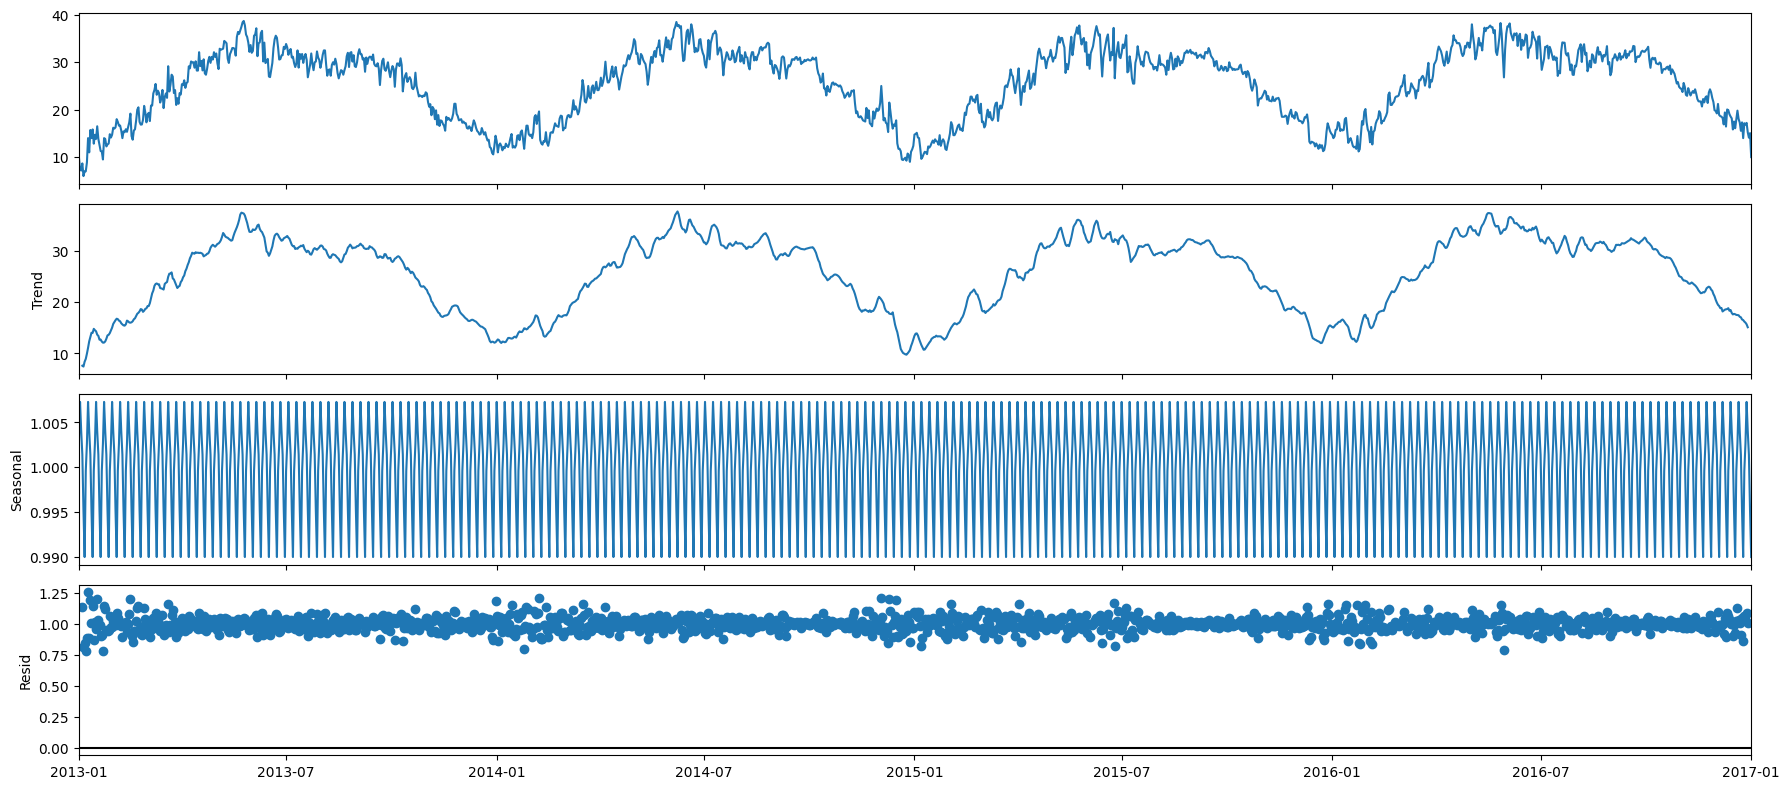

In [26]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y, model = 'multiplicative')
plt.figure(figsize = (18,8))
decomposition.plot()
plt.show()

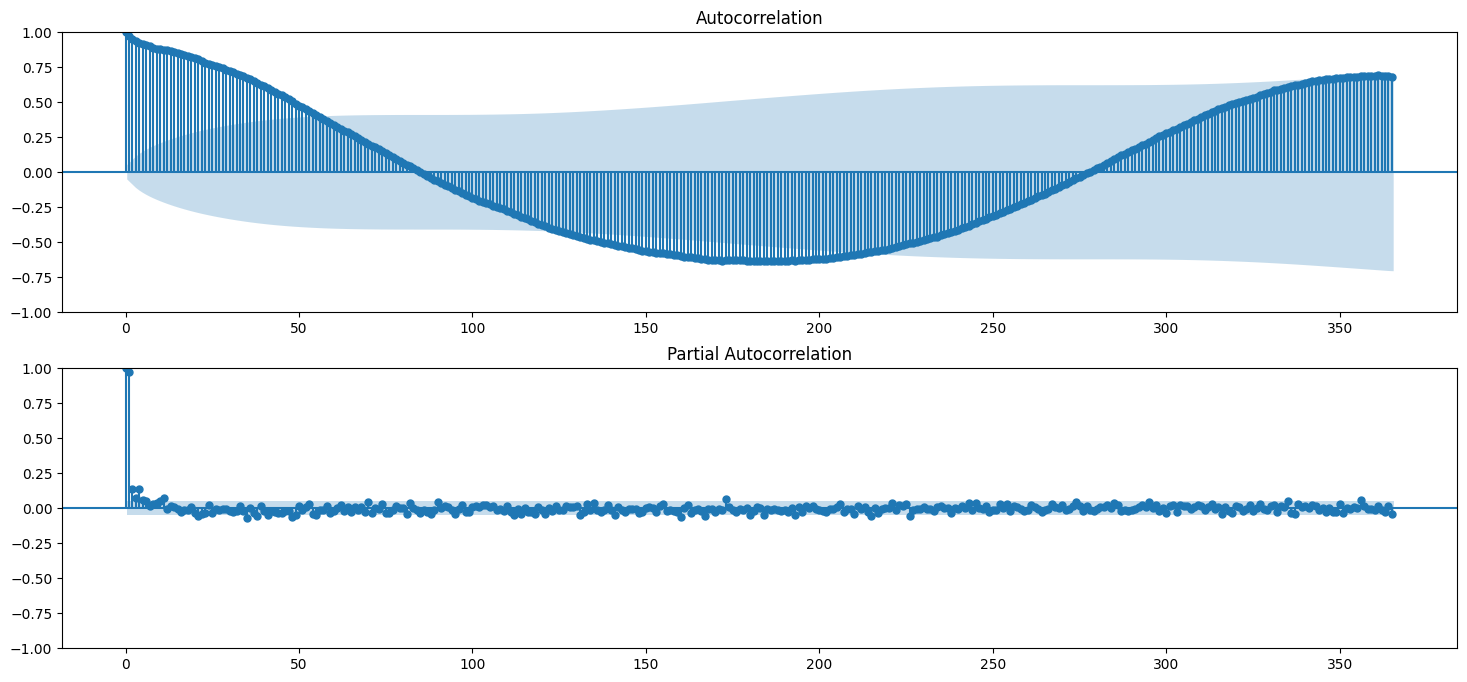

In [28]:
# ACF & PACF Plots
plt.figure()
plt.subplot(211)
plot_acf(y['meantemp'], ax=plt.gca(), lags = 365)
plt.subplot(212)
plot_pacf(y['meantemp'], ax=plt.gca(), lags = 365)
plt.show()

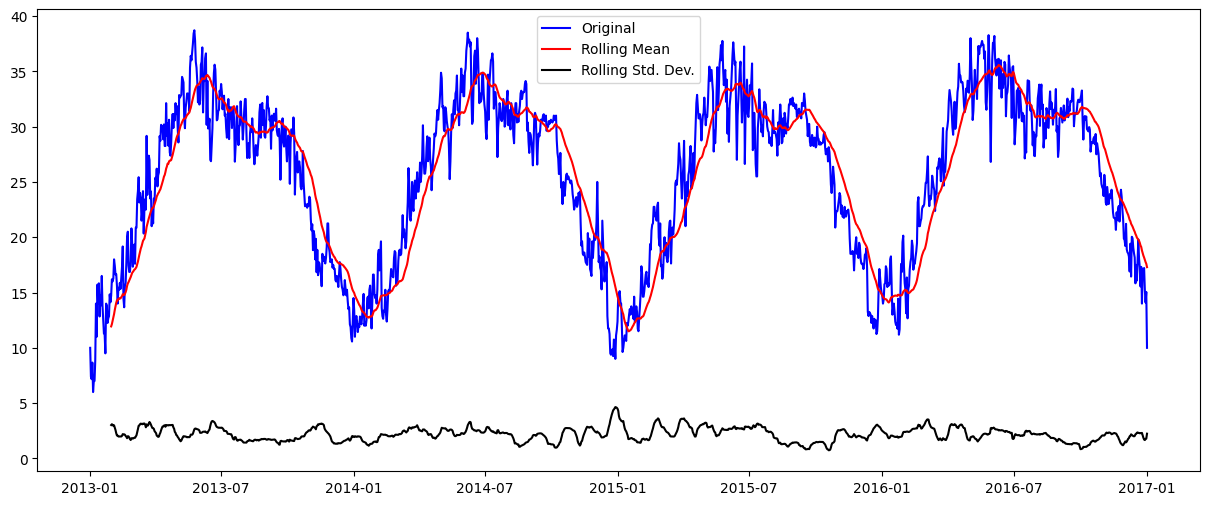

In [29]:
# Rolling Mean & Rolling Standard Deviation
rolmean = y.rolling(window = 30).mean()
rolstd = y.rolling(window = 30).std()

plt.figure(figsize = (15,6))
orig = plt.plot(y, color = 'blue', label ='Original')
mean  = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std. Dev.')
plt.legend(loc = 'best')
plt.show()

## Stationarity Data

In [30]:
# Augmented Dicky-Fuller Test
print('-------------Results of Dicky Fuller Test -------------')
dftest = adfuller(y['meantemp'], autolag = 'AIC')
dfoutput = pd.Series(data = dftest[0:4], index = ['Test Statistic : adf', 'p-value : MacKinnon\'s approximate p-value',
                                                 'No. of Lags used', 'No. of observations used'])
for key,value in dftest[4].items():
    dfoutput[f'Critical Value ({key})'] = value
dfoutput['Maximized AIC:'] = dftest[5]
print(dfoutput)

-------------Results of Dicky Fuller Test -------------
Test Statistic : adf                           -2.021069
p-value : MacKinnon's approximate p-value       0.277412
No. of Lags used                               10.000000
No. of observations used                     1451.000000
Critical Value (1%)                            -3.434865
Critical Value (5%)                            -2.863534
Critical Value (10%)                           -2.567832
Maximized AIC:                               5423.895746
dtype: float64


Data tidak stationer karena p-value diatas 0,05

### Membuat Data Menjadi Stationer

In [37]:
from statsmodels.tsa.stattools import adfuller
# Creating general function to test stationarity of a time series

def test_stationarity(timeseries):
    # Rolling Mean & Rolling Standard Deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    plt.figure(figsize = (15,6))
    orig = plt.plot(timeseries, color = 'blue', label ='Original')
    mean  = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std. Dev.')
    plt.legend(loc = 'best')
    plt.show()

    # Augmented Dicky-Fuller Test
    print('-------------Results of Dicky Fuller Test -------------')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(data = dftest[0:4], index = ['Test Statistic : adf', 'p-value : MacKinnon\'s approximate p-value',
                                                     'No. of Lags used', 'No. of observations used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    dfoutput['Maximized AIC:'] = dftest[5]
    print(dfoutput)

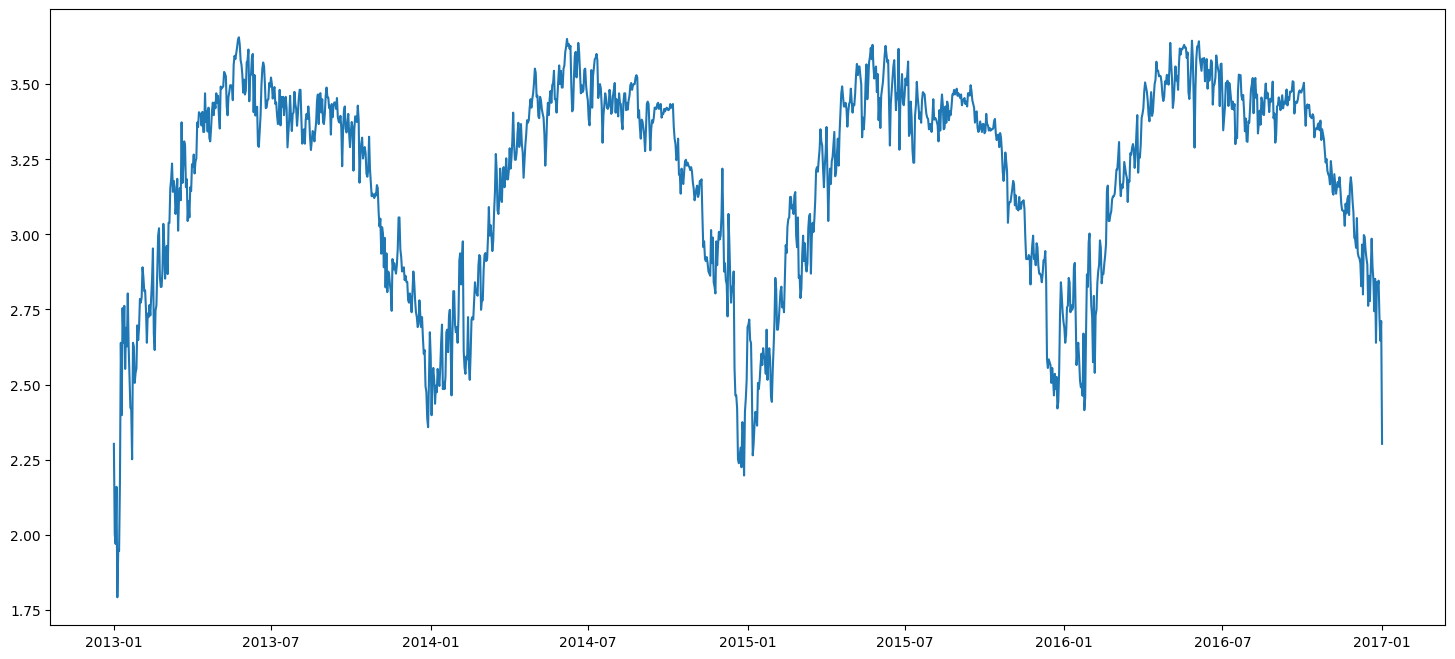

In [38]:
# Log Transformation
ts_log = np.log(y)
plt.plot(ts_log)

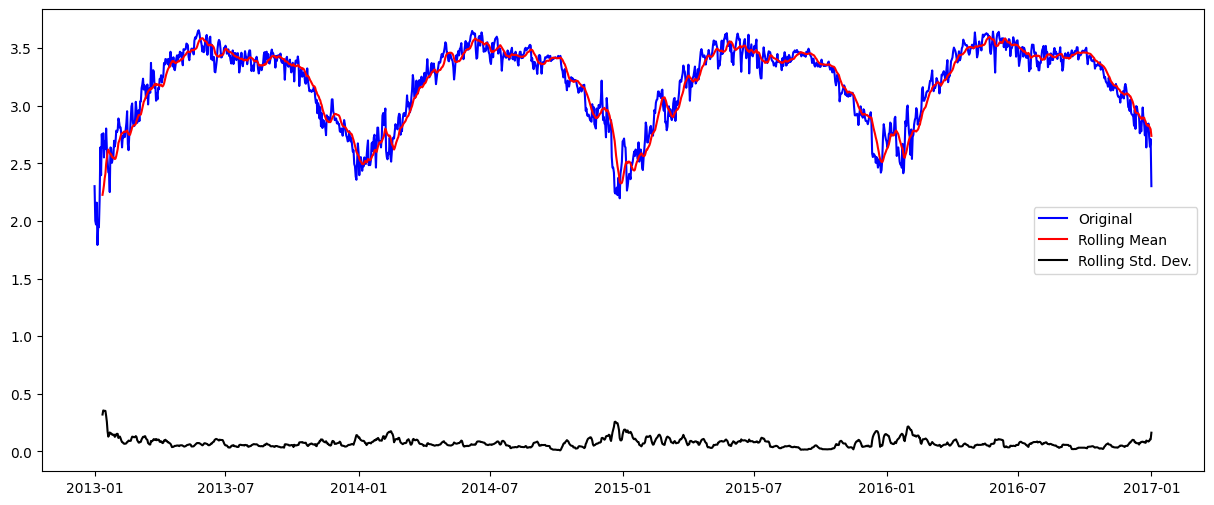

-------------Results of Dicky Fuller Test -------------
Test Statistic : adf                           -3.586512
p-value : MacKinnon's approximate p-value       0.006024
No. of Lags used                                5.000000
No. of observations used                     1456.000000
Critical Value (1%)                            -3.434849
Critical Value (5%)                            -2.863527
Critical Value (10%)                           -2.567828
Maximized AIC:                              -3599.947672
dtype: float64


In [39]:
# Stationarity test of log transformed TS
test_stationarity(ts_log)

Data sudah stationer karena p-value dibawah 0,05

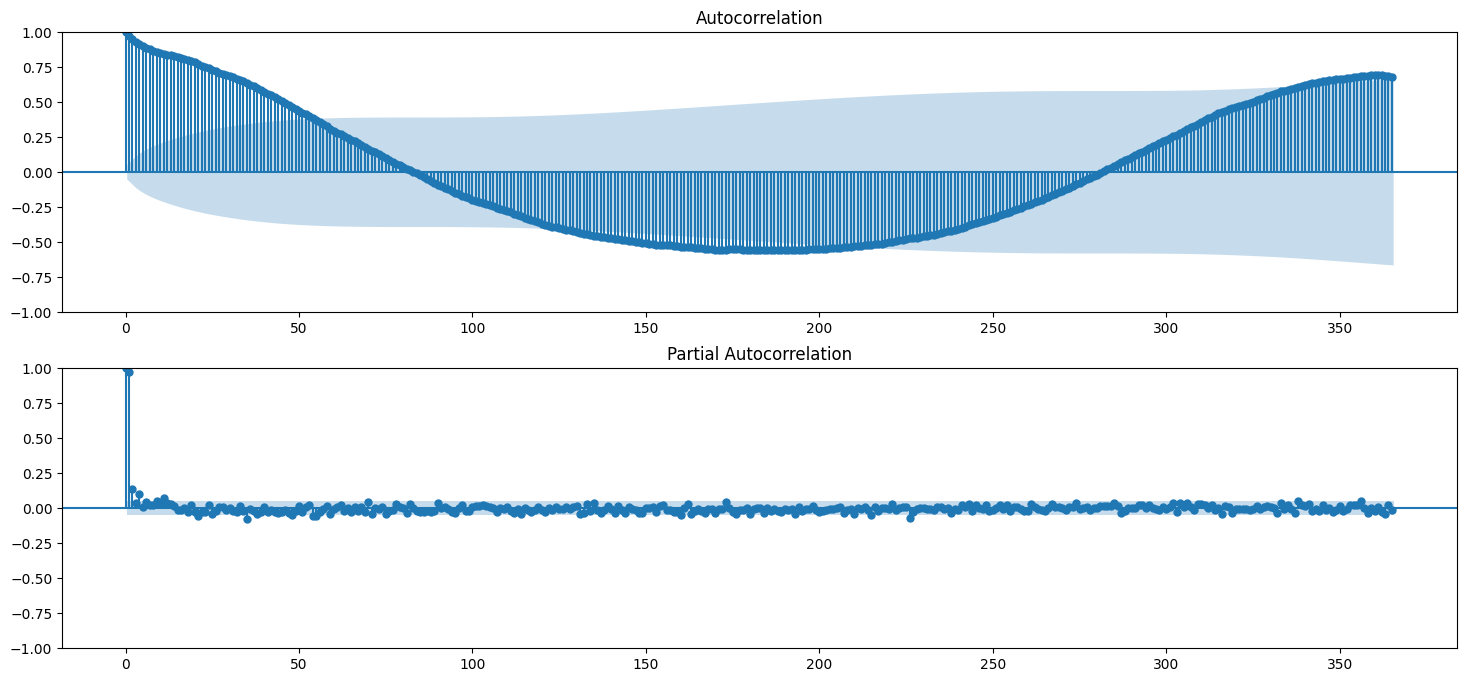

In [46]:
# Estimating p & q parameters from PACF & ACF plot resp.
plt.figure()
plt.subplot(211)
plot_acf(ts_log['meantemp'], ax=plt.gca(), lags = 365)
plt.subplot(212)
plot_pacf(ts_log['meantemp'], ax=plt.gca(), lags = 365)
plt.show()

## Time Series Forecasting

### ARIMA

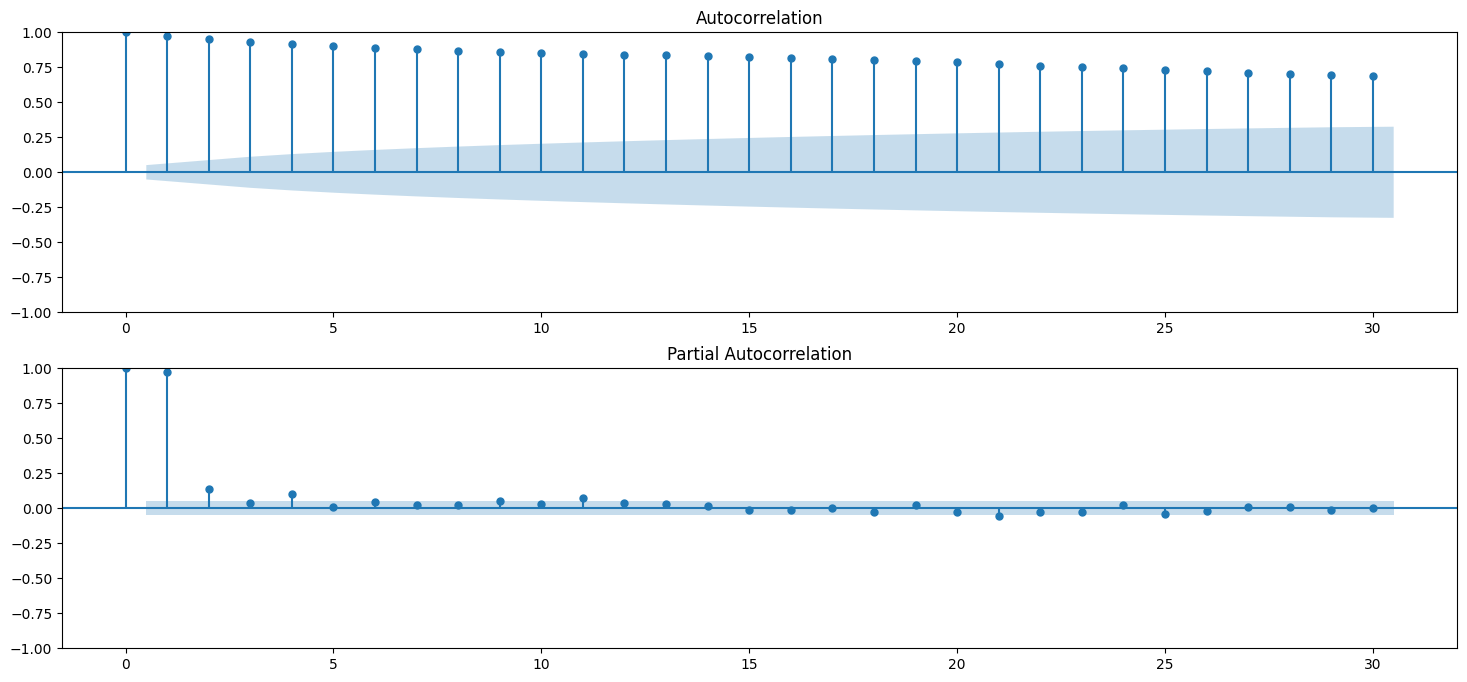

In [53]:
# Estimating p & q parameters from PACF & ACF plot resp.
plt.figure()
plt.subplot(211)
plot_acf(ts_log['meantemp'], ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(ts_log['meantemp'], ax=plt.gca(), lags = 30)
plt.show()

In [63]:
# Seasonal Differencing
ts_log_diff = ts_log - ts_log.shift(periods = 4)

In [64]:
# Dropping NA values
ts_log_diff = ts_log_diff.dropna()

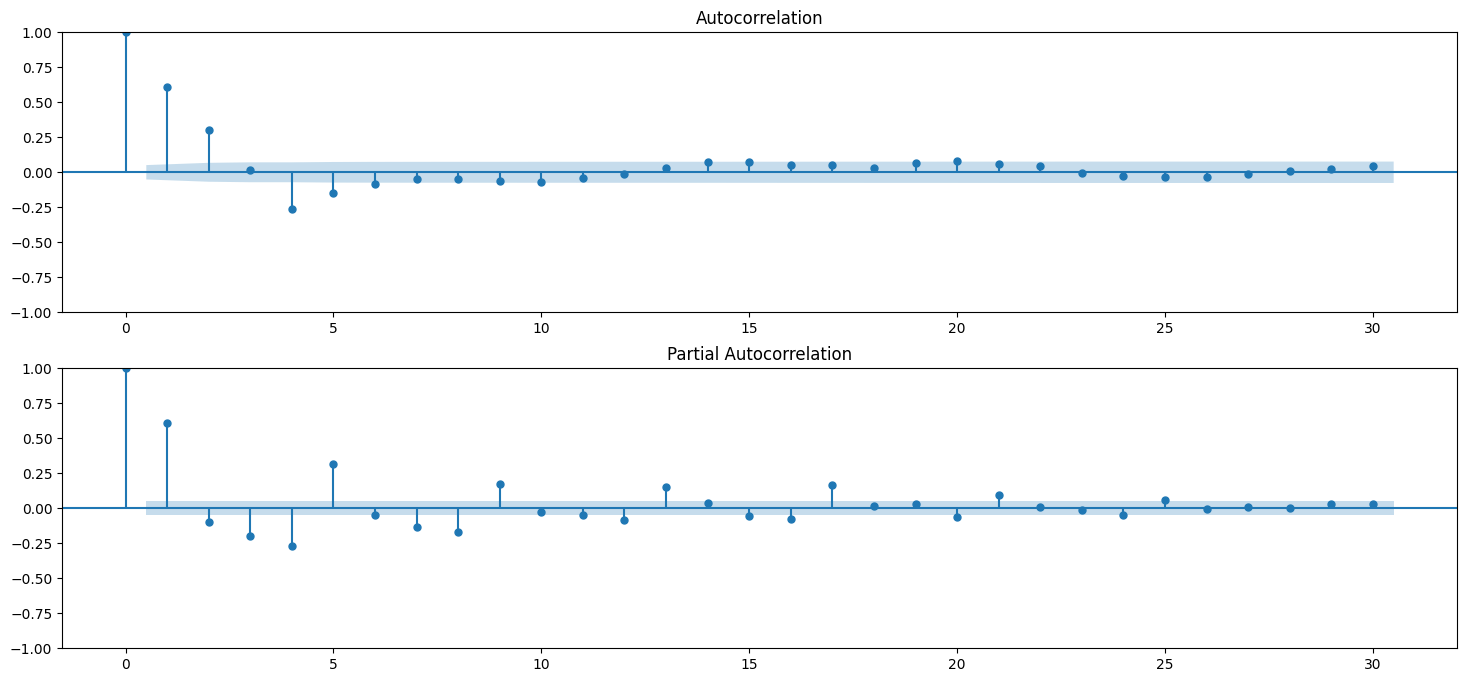

In [65]:
# Estimating p & q parameters from PACF & ACF plot resp.
plt.figure()
plt.subplot(211)
plot_acf(ts_log_diff['meantemp'], ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(ts_log_diff['meantemp'], ax=plt.gca(), lags = 30)
plt.show()

In [66]:
# Model 1
model1 = ARIMA(train_ts, order = (5,1,4))
results1 = model1.fit()

In [67]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               meantemp   No. Observations:                 1169
Model:                 ARIMA(5, 1, 4)   Log Likelihood               -2207.466
Date:                Sat, 16 Dec 2023   AIC                           4434.932
Time:                        19:47:26   BIC                           4485.562
Sample:                    01-01-2013   HQIC                          4454.029
                         - 03-14-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1844      0.674      0.274      0.784      -1.136       1.505
ar.L2         -0.7553      0.171     -4.425      0.000      -1.090      -0.421
ar.L3          0.4693      0.499      0.941      0.347      -0.508       1.447
ar.L4          0.0229      0.391      0.058      0.953      -0.744       0.790
ar.L5         -0.0523      0.043     -1.207      0.227      -0.137       0.033
ma.L1         -0.4013      0.674     -0.595      0.552      -1.723       0.920
ma.L2          0.6960      0.311      2.240      0.025       0.087       1.305
ma.L3         -0.7379      0.454     -1.625      0.104      -1.628       0.152
ma.L4         -0.0031      0.541     -0.006      0.995      -1.063       1.057
sigma2         2.5711      0.085     30.120      0.000       2.404       2.738
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               209.33
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.44
Prob(H) (two-sided):                  0.62   Kurtosis:                         4.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
arima1 = results1.forecast(steps = len(test_ts))

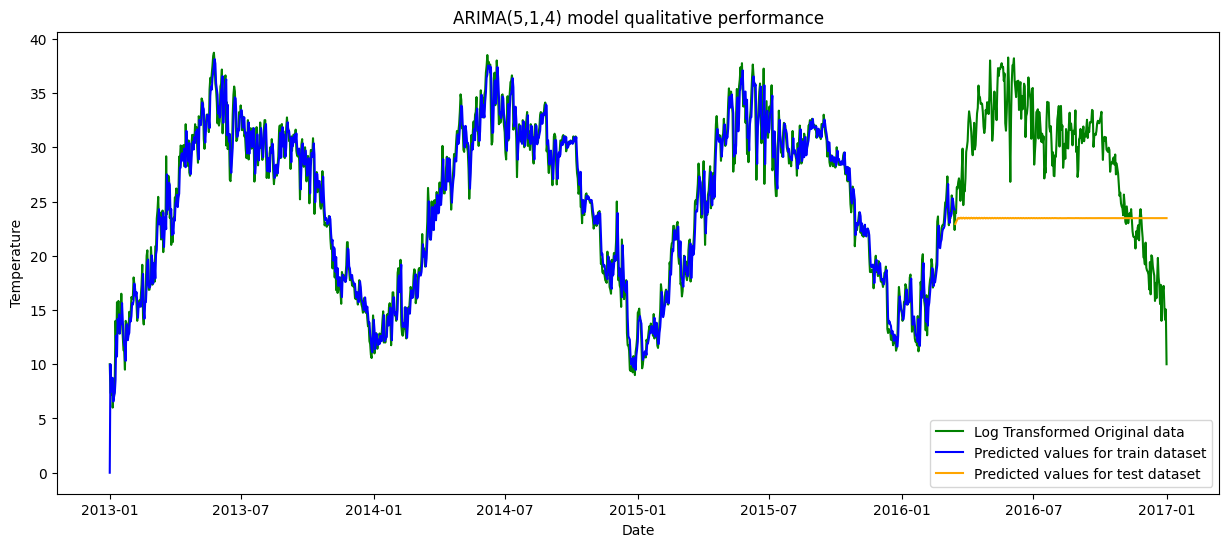

In [75]:
plt.figure(figsize = (15,6))
plt.plot(y, color = 'green', label = 'Log Transformed Original data')
plt.plot(results1.fittedvalues, color = 'blue', label = 'Predicted values for train dataset')
plt.plot(arima1, color = 'orange', label = 'Predicted values for test dataset')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('ARIMA(5,1,4) model qualitative performance')
plt.legend(loc = 'best')
plt.show()

### SARIMA

In [78]:
# Model 2
model2 = ARIMA(train_ts, order = (5,1,0), seasonal_order=(5,1,0,20))
results2 = model2.fit()

In [79]:
arima2 = results2.forecast(steps = len(test_ts))

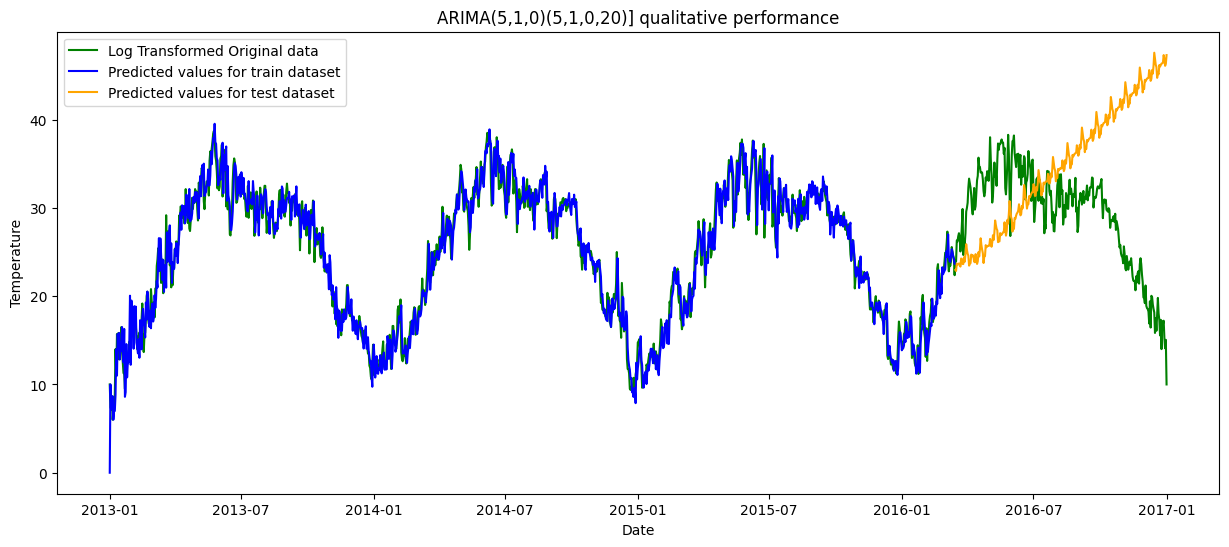

In [82]:
plt.figure(figsize = (15,6))
plt.plot(y, color = 'green', label = 'Log Transformed Original data')
plt.plot(results2.fittedvalues, color = 'blue', label = 'Predicted values for train dataset')
plt.plot(arima2, color = 'orange', label = 'Predicted values for test dataset')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('ARIMA(5,1,0)(5,1,0,20)] qualitative performance')
plt.legend(loc = 'best')
plt.show()

### Double Exponential Smoothing

In [85]:
double_exp = ExponentialSmoothing(train_ts, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=365, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(300)

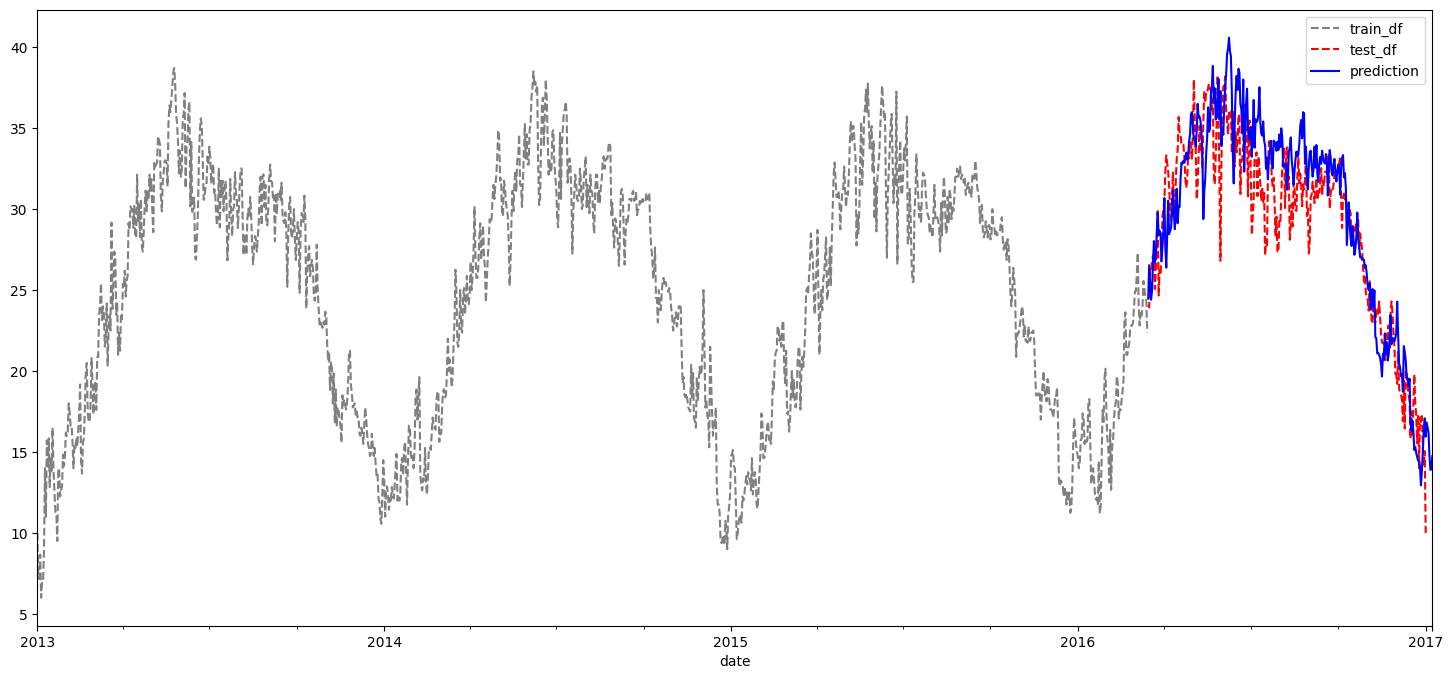

In [86]:
train_ts['meantemp'].plot(style='--', color='gray', legend=True, label='train_df')
test_ts['meantemp'].plot(style='--', color='r', legend=True, label='test_df')
double_exp_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

### Triple Exponential Smoothing

In [95]:
hw_model = ExponentialSmoothing(train_ts['meantemp'],
                          trend    ='add',
                          initialization_method='heuristic',
                          seasonal = "add",
                          seasonal_periods=365,
                          damped_trend=True).fit()
hw_train_pred =  hw_model.fittedvalues
hw_test_pred =  hw_model.forecast(305)

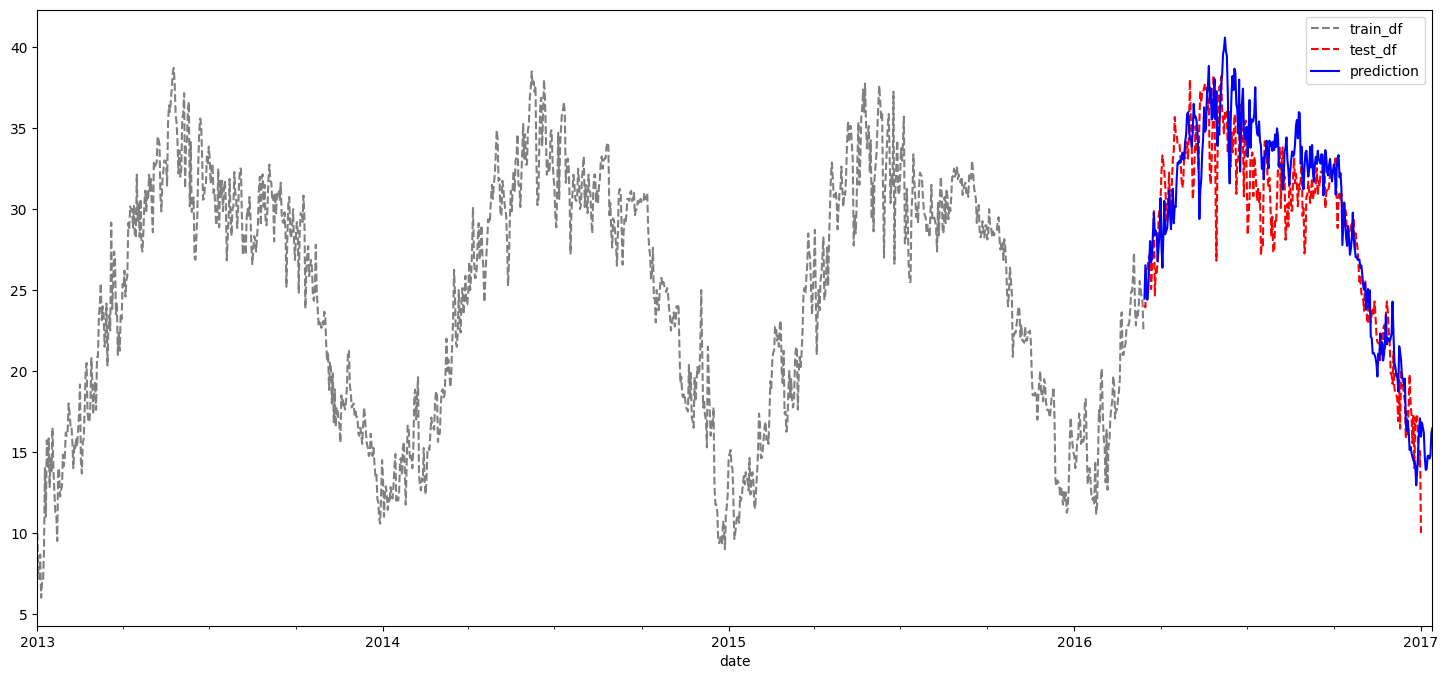

In [96]:
train_ts['meantemp'].plot(style='--', color='gray', legend=True, label='train_df')
test_ts['meantemp'].plot(style='--', color='r', legend=True, label='test_df')
hw_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

## Implementasi Model Terbaik (Triple Exponential Smoothing)

In [100]:
hw_model = ExponentialSmoothing(y['meantemp'],
                          trend    ='add',
                          initialization_method='heuristic',
                          seasonal = "add",
                          seasonal_periods=365,
                          damped_trend=True).fit()
texp_pred =  hw_model.forecast(100)

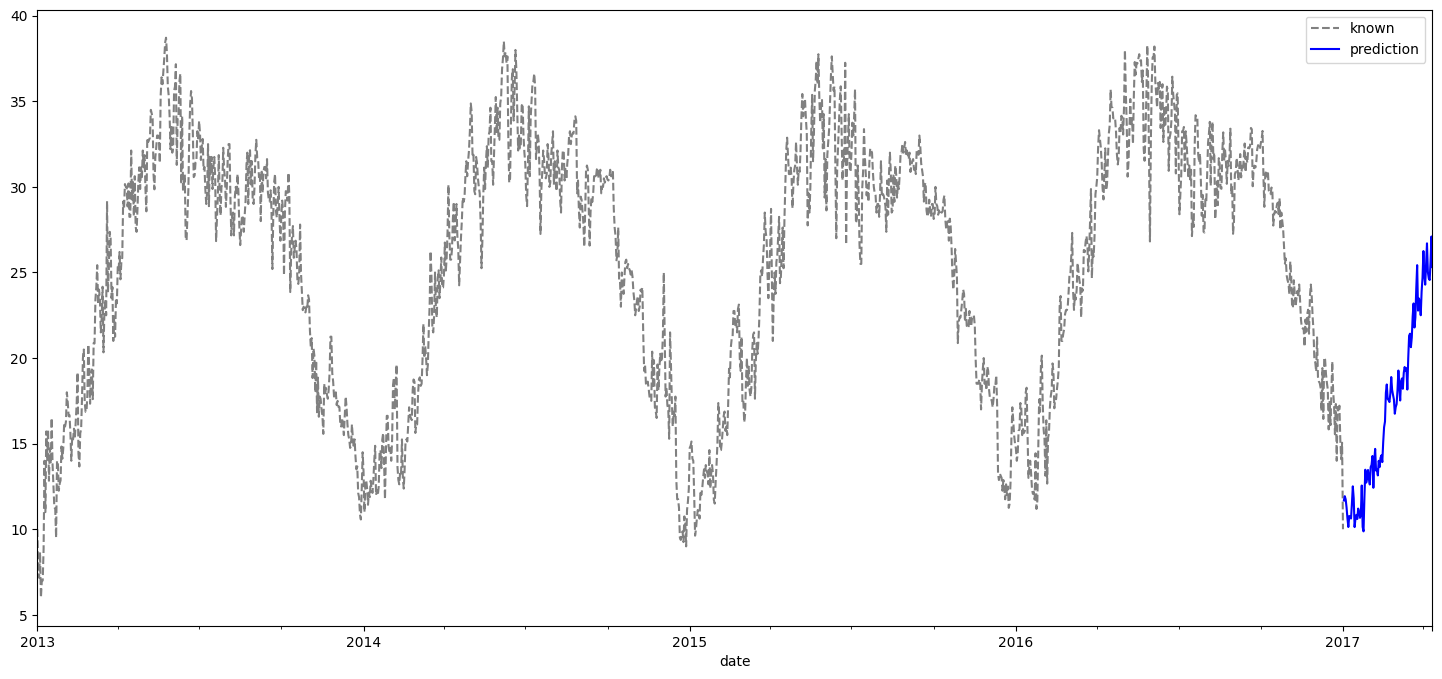

In [101]:
y['meantemp'].plot(style='--', color='gray', legend=True, label='known')
texp_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [106]:
import pickle

pickle.dump(hw_model, open('Model_Prediksi.sav','wb'))